# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:**
5.1: To forecast future values of a univariate time series using LSTM-based models.

5.2: To generate next characters/words based on a given input sequence using LSTM.

5.3: To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).

**Student Name:** Khushi Narad

**Student ID:** 202201040084

**Group Members**:
(1) Shivanjali Jagtap
(2) Sachin Jadhav


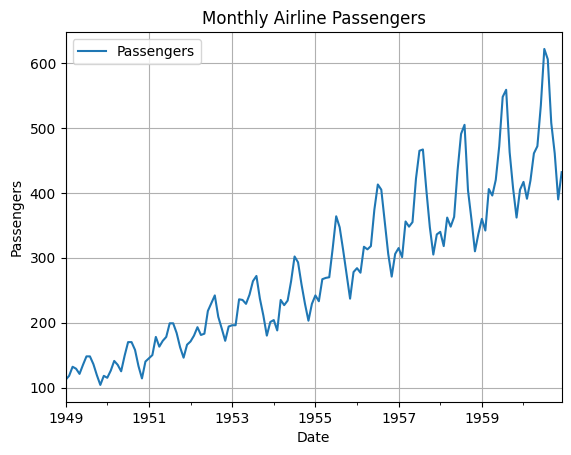

In [ ]:
#Experiment 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)

# Convert to datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Plot data
df.plot(title='Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()


In [ ]:
# Normalize the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Convert to supervised learning format
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

# Train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0747 - val_loss: 0.0594
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0135 - val_loss: 0.0310
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0140 - val_loss: 0.0426
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0115 - val_loss: 0.0493
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0095 - val_loss: 0.0276
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0101 - val_loss: 0.0260
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0088 - val_loss: 0.0288
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0100 - val_loss: 0.0275
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - val_loss: 0.0267
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0090 - val_loss: 0.0272
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0079 - val_loss: 0.0262
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0080 - val_l

In [ ]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# RMSE & MAE
rmse = np.sqrt(mean_squared_error(y_test_inv, test_predict))
mae = mean_absolute_error(y_test_inv, test_predict)

print(f'✅ RMSE: {rmse:.2f}')
print(f'✅ MAE: {mae:.2f}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ RMSE: 41.89
✅ MAE: 33.79


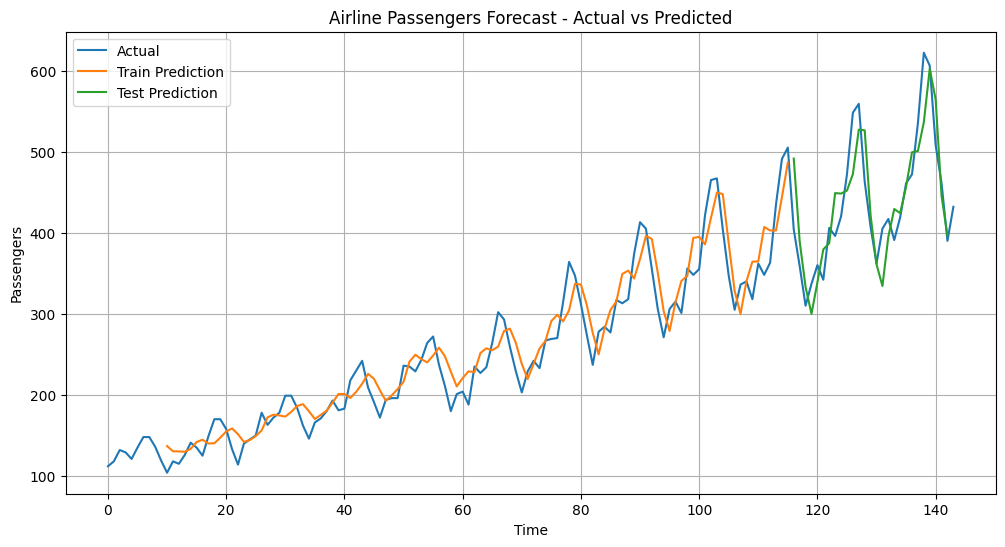

In [ ]:
# Create empty arrays for plotting
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, 0] = train_predict[:, 0]

test_plot = np.empty_like(scaled_data)
test_plot[:, :] = np.nan

# Calculate correct starting index for test predictions
test_start = len(train_predict) + (time_step)
test_end = test_start + len(test_predict)

# Fill test predictions
test_plot[test_start:test_end, 0] = test_predict[:, 0]

# Inverse scale actual data
original_data = scaler.inverse_transform(scaled_data)

# Plot all
plt.figure(figsize=(12, 6))
plt.plot(original_data, label='Actual')
plt.plot(train_plot, label='Train Prediction')
plt.plot(test_plot, label='Test Prediction')
plt.title('Airline Passengers Forecast - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# EXPERIMENT 2

In [ ]:
# Step 1: Install required packages
!pip install tensorflow matplotlib


In [ ]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random


In [ ]:
# Step 3: Load your jokes dataset
df = pd.read_csv("/content/jokes.csv")
df.dropna(inplace=True)

# Use the correct column
jokes = df['Joke'].astype(str).tolist()
text_data = " ".join(jokes).lower()

print("Total jokes:", len(jokes))
print("Sample joke:", jokes[0])


Total jokes: 199
Sample joke: [me narrating a documentary about narrators] "I can't hear what they're saying cuz I'm talking"


In [ ]:
# Step 4: Tokenize text into words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
word_index = tokenizer.word_index
total_words = len(word_index) + 1

# Generate sequences
input_sequences = []
for line in jokes:
    token_list = tokenizer.texts_to_sequences([line.lower()])[0]
    for i in range(1, len(token_list)):
        n_gram = token_list[:i+1]
        input_sequences.append(n_gram)

# Pad sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split input and label
X = input_sequences[:, :-1]
y = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=total_words)

print("Total training sequences:", len(X))


Total training sequences: 3222


In [ ]:
# Step 5: Build the LSTM model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the model
history = model.fit(X, y, epochs=200, verbose=1)



Epoch 1/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9229 - loss: 0.5484
Epoch 2/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9231 - loss: 0.5274
Epoch 3/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9238 - loss: 0.5250
Epoch 4/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9178 - loss: 0.5399
Epoch 5/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9205 - loss: 0.5195
Epoch 6/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9150 - loss: 0.5115
Epoch 7/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9292 - loss: 0.4638
Epoch 8/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9307 - loss: 0.4521
Epoch 9/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9316 - loss: 0.4654
Epoch 10/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9250 - loss: 0.4635
Epoch 11/200
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9366 - loss: 0.4335
Epoch 12/200
101/101 ━━━━━━━━━━━━━━━━━━━

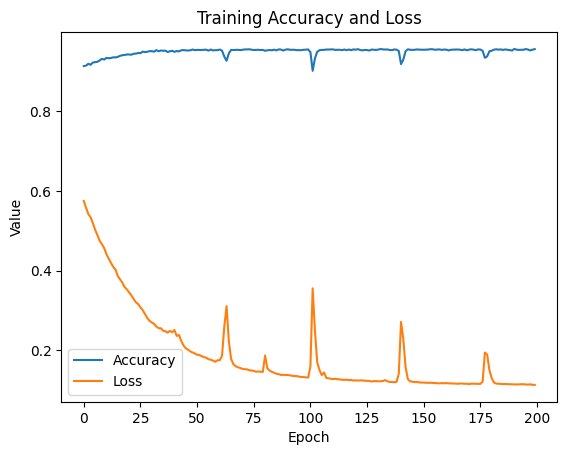

In [ ]:
# Step 7: Plot accuracy/loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title("Training Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()


In [ ]:
# Step 8: Generate new jokes
def generate_joke(seed_text, next_words=20, temperature=1.0):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]

        # Temperature sampling
        predictions = np.log(predictions + 1e-8) / temperature
        exp_preds = np.exp(predictions)
        predictions = exp_preds / np.sum(exp_preds)

        predicted = np.random.choice(range(total_words), p=predictions)
        output_word = tokenizer.index_word.get(predicted, "")
        seed_text += " " + output_word
    return seed_text


In [ ]:
# Step 9: Generate a joke using a random seed
seed = random.choice(jokes).split()[:5]
seed_text = " ".join(seed)
print("Seed:", seed_text)
print("\nGenerated Joke:\n")
print(generate_joke(seed_text, next_words=50, temperature=0.8))


Seed: Donald Trump will ban the

Generated Joke:

Donald Trump will ban the sale of shredded cheese he wants to make america grate again the were person on with your you but just fight daytime crimes and make out born a porky pine leave in the doorbell pine cut out cut out of black porky pine black porky pine medium miley porky pine


In [ ]:
# Experiment 3

In [ ]:

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import seaborn as sns


In [ ]:
# Step 2: Load Dataset from URL
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Step 3: Preprocess the Data
# Encode labels: ham = 0, spam = 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Clean the text (lowercase, remove non-alphanumeric characters)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z09\s]', '', text)
    return text

df['message'] = df['message'].apply(clean_text)


In [ ]:
# Step 4: Tokenize and Pad Sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['message'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['message'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'], test_size=0.2, random_state=42)


In [ ]:
# Step 6: Build the LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64),  # Removed input_length as it's not needed
    LSTM(64),  # LSTM layer with 64 units
    Dropout(0.5),  # Dropout layer for regularization
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 8: Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8383 - loss: 0.4589 - val_accuracy: 0.8664 - val_loss: 0.3937
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8703 - loss: 0.3942 - val_accuracy: 0.8664 - val_loss: 0.3951
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8699 - loss: 0.3933 - val_accuracy: 0.8664 - val_loss: 0.3943
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8594 - loss: 0.4118 - val_accuracy: 0.8664 - val_loss: 0.3933
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8636 - loss: 0.4061 - val_accuracy: 0.8664 - val_loss: 0.3933
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8738 - loss: 0.3854 - val_accuracy: 0.8664 - val_loss: 0.3937
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8632 - loss: 0.4040 - val_accuracy: 0.8664 - val_loss: 0.3934
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8634 - loss: 0.4053 - val

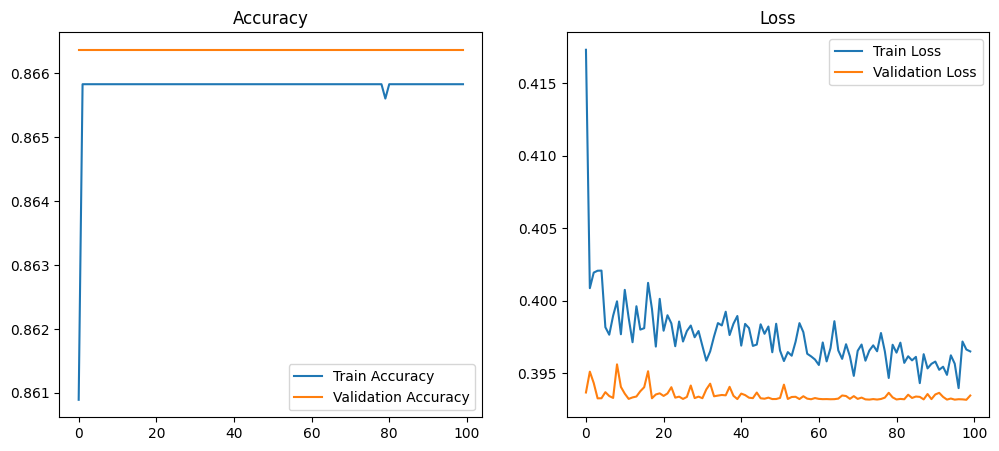

In [ ]:
# Step 9: Plot Training Accuracy and Loss
plt.figure(figsize=(12,5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [ ]:
# Step 10: Evaluate the Model with Classification Report and Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print(classification_report(y_test, y_pred))



35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


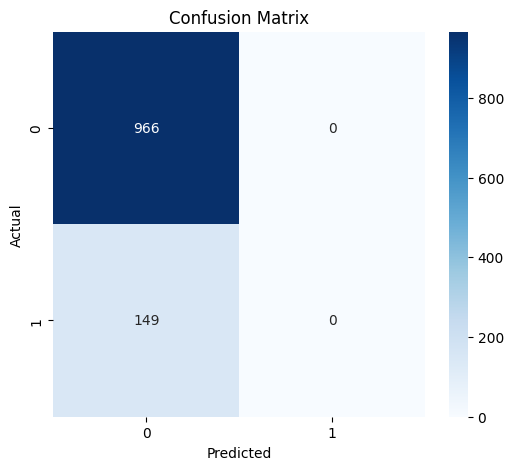

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()